In [ ]:
#first we start by intializing libraries that are going to help through our project:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
boston_file_path = '/content/Boston.csv'
# storing our data into a data frame:
boston_data = pd.read_csv(boston_file_path) 
# print a summary of the data in boston data
boston_data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#Doing some analyisis on the data:

#First what is the dimentions of our data set?
print(np.shape(boston_data)) 

#SECOUND What is the columns names ?
print("")
print(boston_data.columns)

(506, 15)

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


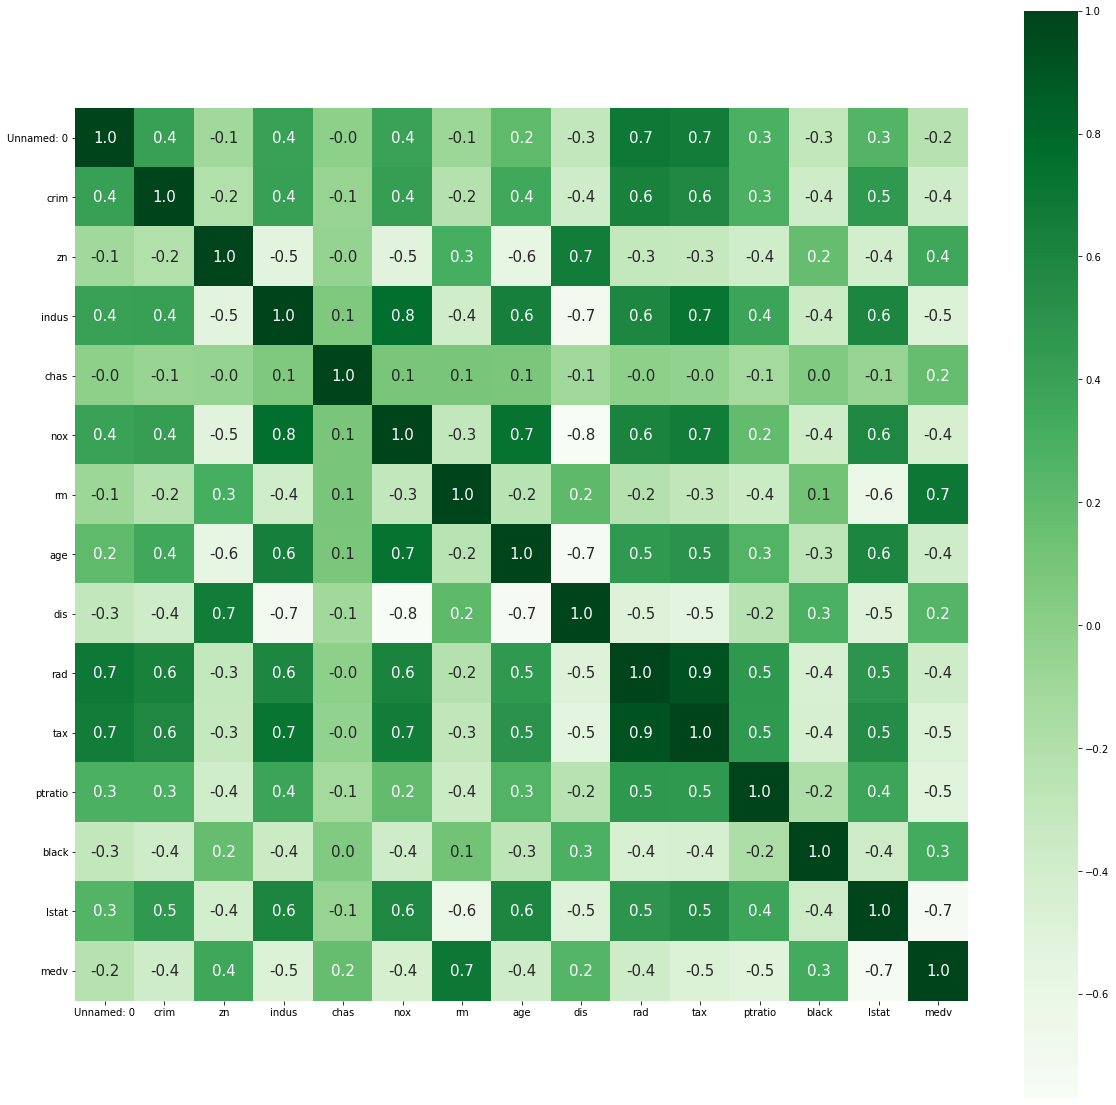

In [ ]:
# Plotting the heatmap of correlation between features
corr = boston_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
#Now we need to select prediction target:
y = boston_data.medv

#And we need to choose our features:
boston_features = ['crim', 'zn', 'indus', 'chas', 'nox','rm', 'age', 'dis','rad', 'tax', 'ptratio', 'black', 'lstat']

x = boston_data[boston_features]

In [ ]:
#now we build multiple models to see which works better:

#Building our model:(if we used decision tree from sklearn)
from sklearn.tree import DecisionTreeRegressor

# to ensure same results each run we need to spacify random state
boston_model = DecisionTreeRegressor(random_state=1)

# Fit model
boston_model.fit(x, y)

print("predicting the prices of the first 5 houses in data set :")
print(x.head())
print("**** predictions******")
print(boston_model.predict(x.head()))

predicting the prices of the first 5 houses in data set :
      crim    zn  indus  chas    nox  ...  rad  tax  ptratio   black  lstat
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222     18.7  396.90   5.33

[5 rows x 13 columns]
**** predictions******
[24.  21.6 34.7 33.4 36.2]


In [ ]:
#validating our model:(by importing traing split from sklearn)
#then calculating the accuracy : 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# the random_state argument guarantees we get the same split every time:
trainx, valuex, trainy, valuey = train_test_split(x, y, random_state = 0)

#building and fitting our model
boston_model = DecisionTreeRegressor(max_depth=50, random_state=1)
boston_model.fit(trainx, trainy)

val_predictions = boston_model.predict(valuex)

print("OUR Aboslute mean error is : ")
print("")
print(mean_absolute_error(valuey, val_predictions))

OUR Aboslute mean error is : 

3.2322834645669287
